In [17]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

In [18]:
best = 'dataset/best'
no_best = 'dataset/no_best'


images = []
for file in list(os.listdir(best)):
    images.append(cv2.imread(best+'/'+file))
    
for file in list(os.listdir(no_best)):
    images.append(cv2.imread(no_best+'/'+file)) 
    
images = np.array(images)

In [19]:
'''
1,0 ->  with best
0,1 -> no best
'''
n_best = len(list(os.listdir(best)))
n_no_best = len(list(os.listdir(no_best)))
labels = np.zeros(( n_best  + n_no_best, 2  ))
labels[:n_best,0] = 1
labels[n_best:,1] = 1
print('y shape',labels.shape)
print('x shape',images.shape)

y shape (486, 2)
x shape (486, 400, 400, 3)


In [20]:
from random import shuffle
data_size = labels.shape[0]
index = list(range(data_size))
shuffle(index)
index = np.array(index)

images =   images[index]
labels =   labels[index,:]

x_train =  images[:int(0.8*data_size)]
y_train =  labels[:int(0.8*data_size),:] 

x_test =   images[int(0.8*data_size):]
y_test =   labels[int(0.8*data_size):,:]

no best


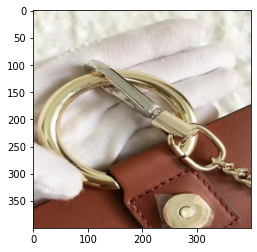

In [21]:
from random import randint
i = randint(0, len(x_test))
plt.imshow(x_test[i][:,:,::-1])
print((np.array(['with best','no best'])[y_test[i] == 1])[0])

In [22]:
img_rows, img_cols = 400,400
input_shape = (img_rows, img_cols, 3)
batch_size = 1
num_classes = 2
epochs = 25

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 398, 398, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 197, 197, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 48, 64)       

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=19,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 388 samples, validate on 98 samples
Epoch 1/19
388/388 [==============================] - 102s 262ms/step - loss: 15.6651 - accuracy: 0.5619 - val_loss: 0.6880 - val_accuracy: 0.5612
Epoch 2/19
 39/388 [==>...........................] - ETA: 1:44 - loss: 1.3297 - accuracy: 0.7949

In [9]:
model.save('best_image.h5')

In [10]:
new_model = keras.models.load_model('best_image.h5')

['with best']


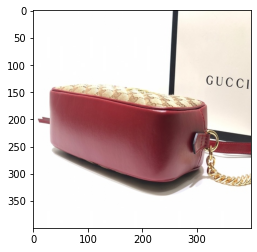

In [16]:
from random import randint
i = randint(0, 100)
m = new_model.predict(x_test[i].reshape(-1,400,400,3)) == new_model.predict(x_test[i].reshape(-1,400,400,3)).max()
plt.imshow(x_test[i][:,:,::-1])
print(np.array(['with best','no best'])[m[0]])